# Student Information

Name : Yang, Po-Yen

Student ID : 20561878

HKUST email address : pyangaf@connect.ust.hk

Name : Huang, Yi-Feng

Student ID : 20470495

HKUST email address : yhuangcr@connect.ust.hk


# Environment Setup

In [ ]:
import numpy as np
import pandas as pd
import os
import torch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
PATH = './drive/My Drive/Comp 4211/Project 1/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Preprocessing
## Define Preprocessed Dataframe

In [ ]:
from xml.etree import cElementTree as ET
from PIL import Image

# Define preprocessed dataframe
preprocess_columns = ['image_path', 'label', 'pose', 'truncated', 'occluded', 'difficult']
preprocessed_df = pd.DataFrame(columns = preprocess_columns)
preprocessed_df = preprocessed_df.astype(dtype= 
                  {"image_path":"str","label":"int64","pose":"str",
                   "truncated":"str","occluded":"str","difficult":"str"})

## Test Drive Path Setup

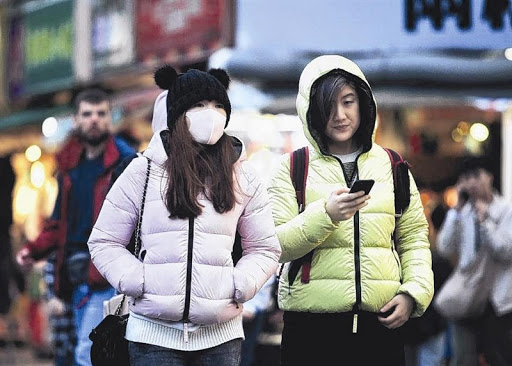

testing_row
                                     image_path  label  ... occluded difficult
0  preprocessed/images/maksssksksss0person0.png      0  ...        0         0

[1 rows x 6 columns]


testing_row
                                     image_path  label  ... occluded difficult
0  preprocessed/images/maksssksksss0person1.png      1  ...        0         0

[1 rows x 6 columns]


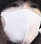

testing_row
                                     image_path  label  ... occluded difficult
0  preprocessed/images/maksssksksss0person2.png      0  ...        0         0

[1 rows x 6 columns]


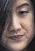

In [ ]:
# Test drive path setup correctly by reading the first xml and printing image
test_annotation_path = PATH + "archive/annotations/maksssksksss0.xml"
annotation = ET.parse(test_annotation_path)
root = annotation.getroot()
raw_image_folder = root.find('folder').text
raw_image_filename = root.find('filename').text
raw_image_path = raw_image_folder + "/" + raw_image_filename
current_image = Image.open(PATH + "archive/" + raw_image_path)
annotation_index = 0
display(current_image)
for child in root.iter('object'):
  name = child.find('name').text
  pose = child.find('pose').text
  truncated = child.find('truncated').text
  occluded = child.find('occluded').text
  difficult = child.find('difficult').text
  label = 0
  if name == 'without_mask':
    label = 0
  elif name == 'with_mask':
    label = 1
  elif name == 'mask_weared_incorrect':
    label = 2
  else:
    label = 3 # if the raw annotation is neither of the three type, then labeled as 3 as error

  raw_imaage_path_without_dot_png = raw_image_path[:-4]
  extracted_image_path = "preprocessed/" + raw_imaage_path_without_dot_png + "person"+ str(annotation_index) + ".png"
  annotation_index += 1

  new_row = pd.DataFrame({'image_path': [extracted_image_path], 'label': [label], 'pose': [pose], 
            'truncated': [truncated], 'occluded': [occluded], 'difficult': [difficult]})

  print("testing_row")
  print(new_row)

  bndbox = child.find('bndbox')
  xmin = int(bndbox.find('xmin').text)
  ymin = int(bndbox.find('ymin').text)
  xmax = int(bndbox.find('xmax').text)
  ymax = int(bndbox.find('ymax').text)
  cropping_tuple = (xmin, ymin, xmax, ymax)
  cropped_image = current_image.crop(cropping_tuple)
  display(cropped_image)

## Preprocessing

In [ ]:
# Preprocessing from archive raw image and annotation xml file to csv with cropped face files
# Only need to run once, took around 8 minutes
from xml.etree import cElementTree as ET

# Extract all xml annotation to cropped face image and save annotation to dataframe
total_xml_annotation_count = 853
for xml_index in range(total_xml_annotation_count):
  # Read image
  annotation_path = PATH + "archive/annotations/maksssksksss" + str(xml_index) + ".xml"
  annotation = ET.parse(annotation_path)
  root = annotation.getroot()
  raw_image_folder = root.find('folder').text
  raw_image_filename = root.find('filename').text
  raw_image_path = raw_image_folder + "/" + raw_image_filename
  current_image = Image.open(PATH + "archive/" + raw_image_path)
  annotation_index = 0

  # Iterate through annotation (faces in pictures)
  for child in root.iter('object'):
    name = child.find('name').text
    pose = child.find('pose').text
    truncated = child.find('truncated').text
    occluded = child.find('occluded').text
    difficult = child.find('difficult').text
    label = 0
    if name == 'without_mask':
      label = 0
    elif name == 'with_mask':
      label = 1
    elif name == 'mask_weared_incorrect':
      label = 2
    else:
      label = 3 # if the raw annotation is neither of the three type, then labeled as 3 as error

    raw_imaage_path_without_dot_png = raw_image_path[:-4]
    extracted_image_path = "preprocessed/" + raw_imaage_path_without_dot_png + "person"+ str(annotation_index) + ".png"
    annotation_index += 1

    # Save parsed annotation to dataframe
    new_row = pd.DataFrame({'image_path': [extracted_image_path], 'label': [label], 'pose': [pose], 
              'truncated': [truncated], 'occluded': [occluded], 'difficult': [difficult]})
    preprocessed_df = pd.concat([preprocessed_df, new_row])

    # Crop face image and save to drive
    bndbox = child.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    cropping_tuple = (xmin, ymin, xmax, ymax)
    cropped_image = current_image.crop(cropping_tuple)
    cropped_image_save_path = PATH + extracted_image_path
    cropped_image.save(cropped_image_save_path, "png")

# Save dataframe to CSV in drive
preprocessed_csv_path = PATH + "preprocessed/preprocessed.csv"
preprocessed_df.to_csv(preprocessed_csv_path, index=False)

In [ ]:
# Check preprocessed_df's correctness by printing
preprocessed_df

,image_path,label,pose,truncated,occluded,difficult


## Loading Example

In [ ]:
# Load preprocessed dataframe from savedpreprocessed csv
preprocessed_csv_path = PATH + "preprocessed/preprocessed.csv"
loaded_preprocessed_df = pd.read_csv(preprocessed_csv_path)
loaded_preprocessed_df

,image_path,label,pose,truncated,occluded,difficult
0,preprocessed/images/maksssksksss0person0.png,0,Unspecified,0,0,0
1,preprocessed/images/maksssksksss0person1.png,1,Unspecified,0,0,0
2,preprocessed/images/maksssksksss0person2.png,0,Unspecified,0,0,0
3,preprocessed/images/maksssksksss1person0.png,1,Unspecified,0,0,0
4,preprocessed/images/maksssksksss1person1.png,1,Unspecified,0,0,0
...,...,...,...,...,...,...
4067,preprocessed/images/maksssksksss850person1.png,1,Unspecified,0,0,0
4068,preprocessed/images/maksssksksss850person2.png,1,Unspecified,0,0,0
4069,preprocessed/images/maksssksksss851person0.png,1,Unspecified,0,0,0
4070,preprocessed/images/maksssksksss852person0.png,1,Unspecified,0,0,0


In [ ]:
pose_unspecified_count = loaded_preprocessed_df.loc[loaded_preprocessed_df['pose'] == 'Unspecified'].shape[0]
truncated_0_count = loaded_preprocessed_df.loc[loaded_preprocessed_df['truncated'] == 0].shape[0]
occluded_0_count = loaded_preprocessed_df.loc[loaded_preprocessed_df['occluded'] == 0].shape[0]
difficult_0_count = loaded_preprocessed_df.loc[loaded_preprocessed_df['difficult'] == 0].shape[0]
total_data_count = loaded_preprocessed_df.shape[0]
print("pose unspecified: ", pose_unspecified_count, "/", total_data_count)
print("truncated 0     : ", truncated_0_count, "/", total_data_count)
print("occuluded 0     : ", occluded_0_count, "/", total_data_count)
print("difficult 0     : ", difficult_0_count, "/", total_data_count)

pose unspecified:  4072 / 4072
truncated 0     :  4072 / 4072
occuluded 0     :  4072 / 4072
difficult 0     :  4072 / 4072


In [ ]:
# load example processed image 
example_preprocessed_image_path = PATH + loaded_preprocessed_df.iloc[0]['image_path'] 
example_preprocessed_image = Image.open(example_preprocessed_image_path)
display(example_preprocessed_image)

In [ ]:
from sklearn.model_selection import train_test_split
label_0 = loaded_preprocessed_df[loaded_preprocessed_df["label"] == 0]
label_1 = loaded_preprocessed_df[loaded_preprocessed_df["label"] == 1]
label_2 = loaded_preprocessed_df[loaded_preprocessed_df["label"] == 2]
train_valid_0, test_0 = train_test_split(label_0, test_size = 0.1, random_state = 4211)
train_valid_1, test_1 = train_test_split(label_1, test_size = 0.1, random_state = 4211)
train_valid_2, test_2 = train_test_split(label_2, test_size = 0.1, random_state = 4211)
train_0, valid_0 = train_test_split(train_valid_0, test_size = 2/9, random_state = 4211)
train_1, valid_1 = train_test_split(train_valid_1, test_size = 2/9, random_state = 4211)
train_2, valid_2 = train_test_split(train_valid_2, test_size = 2/9, random_state = 4211)

In [ ]:
print(train_0.shape)
print(valid_0.shape)
print(test_0.shape)
print(train_1.shape)
print(valid_1.shape)
print(test_1.shape)
print(train_2.shape)
print(valid_2.shape)
print(test_2.shape)

(501, 6)
(144, 6)
(72, 6)
(2261, 6)
(647, 6)
(324, 6)
(85, 6)
(25, 6)
(13, 6)


In [ ]:
train_path = os.path.join(PATH, "preprocessed/preprocessed_train.csv")
valid_path = os.path.join(PATH, "preprocessed/preprocessed_valid.csv")
test_path = os.path.join(PATH, "preprocessed/preprocessed_test.csv")
train_0.to_csv(train_path, index = False)
train_1.to_csv(train_path, mode = "a", header = False, index = False)
train_2.to_csv(train_path, mode = "a", header = False, index = False)
valid_0.to_csv(valid_path, index = False)
valid_1.to_csv(valid_path, mode = "a", header = False, index = False)
valid_2.to_csv(valid_path, mode = "a", header = False, index = False)
test_0.to_csv(test_path, index = False)
test_1.to_csv(test_path, mode = "a", header = False, index = False)
test_2.to_csv(test_path, mode = "a", header = False, index = False)

In [ ]:
df = pd.read_csv(PATH + "preprocessed/preprocessed_train.csv")
df

,image_path,label,pose,truncated,occluded,difficult
0,preprocessed/images/maksssksksss72person0.png,0,Unspecified,0,0,0
1,preprocessed/images/maksssksksss661person14.png,0,Unspecified,0,0,0
2,preprocessed/images/maksssksksss307person2.png,0,Unspecified,0,0,0
3,preprocessed/images/maksssksksss359person14.png,0,Unspecified,0,0,0
4,preprocessed/images/maksssksksss240person10.png,0,Unspecified,0,0,0
...,...,...,...,...,...,...
2842,preprocessed/images/maksssksksss525person0.png,2,Unspecified,0,0,0
2843,preprocessed/images/maksssksksss423person3.png,2,Unspecified,0,0,0
2844,preprocessed/images/maksssksksss309person0.png,2,Unspecified,0,0,0
2845,preprocessed/images/maksssksksss440person1.png,2,Unspecified,0,0,0


# Data Loader

In [ ]:
from torch.utils.data import Dataset, DataLoader
class FaceDataset(Dataset):
    #constructor
    def __init__(self, csv_file, transform = None):
        self.info_df = pd.read_csv(csv_file)                
        self.transform = transform

    def __getitem__(self, idx):
        image = Image.open(os.path.join(PATH, str(self.info_df.iloc[idx, 0]))).convert('RGB')
        label = np.array(self.info_df.iloc[idx, 1].astype(np.long))
        
        if self.transform is not None:
            image = self.transform(image)
        
        return image, label

    def __len__(self):
        return len(self.info_df)

In [ ]:
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.Resize((32, 32)),
     transforms.RandomHorizontalFlip(),
     transforms.RandomRotation(15),
     transforms.ToTensor()]
)

train_trans = FaceDataset((PATH + "preprocessed/preprocessed_train.csv"), transform)
valid_trans = FaceDataset((PATH + "preprocessed/preprocessed_valid.csv"), transform)
test_trans = FaceDataset((PATH + "preprocessed/preprocessed_test.csv"), transform)

bs = 32

train_loader = DataLoader(train_trans, batch_size = bs, shuffle = True, pin_memory = True)
valid_loader = DataLoader(valid_trans, batch_size = bs, shuffle = False, pin_memory = True)
test_loader = DataLoader(test_trans, batch_size = bs, shuffle = False, pin_memory = True)

dataiter = iter(train_loader)
image, label = dataiter.next()

# Baseline Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), #32*32*32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride = 2), #32*16*16
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1), #64*16*16
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1), #128*16*16
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride = 2), #128*8*8
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1), #256*8*8
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, padding = 1), #512*8*8
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.AvgPool2d((8, 8), stride = 1), #512*1*1
            nn.Flatten()
        )
        self.fc = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 3),
            nn.ReLU()
        )


    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        x = torch.sigmoid(x)
        return x

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
!pip install torchsummaryX
from torchsummaryX import summary

model = Net().cuda()
summary(model, torch.zeros((1, 3, 32, 32)).cuda())

                           Kernel Shape      Output Shape    Params  \
Layer                                                                 
0_cnn.Conv2d_0            [3, 32, 3, 3]   [1, 32, 32, 32]     896.0   
1_cnn.BatchNorm2d_1                [32]   [1, 32, 32, 32]      64.0   
2_cnn.ReLU_2                          -   [1, 32, 32, 32]         -   
3_cnn.MaxPool2d_3                     -   [1, 32, 16, 16]         -   
4_cnn.Conv2d_4           [32, 64, 3, 3]   [1, 64, 16, 16]   18.496k   
5_cnn.BatchNorm2d_5                [64]   [1, 64, 16, 16]     128.0   
6_cnn.ReLU_6                          -   [1, 64, 16, 16]         -   
7_cnn.Conv2d_7          [64, 128, 3, 3]  [1, 128, 16, 16]   73.856k   
8_cnn.BatchNorm2d_8               [128]  [1, 128, 16, 16]     256.0   
9_cnn.ReLU_9                          -  [1, 128, 16, 16]         -   
10_cnn.MaxPool2d_10                   -    [1, 128, 8, 8]         -   
11_cnn.Conv2d_11       [128, 256, 3, 3]    [1, 256, 8, 8]  295.168k   
12_cnn

,Kernel Shape,Output Shape,Params,Mult-Adds
Layer,,,,
0_cnn.Conv2d_0,"[3, 32, 3, 3]","[1, 32, 32, 32]",896.0,884736.0
1_cnn.BatchNorm2d_1,[32],"[1, 32, 32, 32]",64.0,32.0
2_cnn.ReLU_2,-,"[1, 32, 32, 32]",NaN,NaN
3_cnn.MaxPool2d_3,-,"[1, 32, 16, 16]",NaN,NaN
4_cnn.Conv2d_4,"[32, 64, 3, 3]","[1, 64, 16, 16]",18496.0,4718592.0
5_cnn.BatchNorm2d_5,[64],"[1, 64, 16, 16]",128.0,64.0
6_cnn.ReLU_6,-,"[1, 64, 16, 16]",NaN,NaN
7_cnn.Conv2d_7,"[64, 128, 3, 3]","[1, 128, 16, 16]",73856.0,18874368.0
8_cnn.BatchNorm2d_8,[128],"[1, 128, 16, 16]",256.0,128.0


# Training Loop

In [ ]:
pip install tqdm

In [ ]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

def save_checkpoint(save_path, model, optimizer, val_accuracy):
    if save_path==None:
        return
    save_path = save_path 
    state_dict = {'model_state_dict': model.state_dict(),
                  'optimizer_state_dict': optimizer.state_dict(),
                  'val_acc': val_accuracy}

    torch.save(state_dict, save_path)
    print(f'Model saved to {save_path}')

def load_checkpoint(save_path, model, optimizer):
    save_path = save_path 
    state_dict = torch.load(save_path)
    model.load_state_dict(state_dict['model_state_dict'])
    optimizer.load_state_dict(state_dict['optimizer_state_dict'])
    val_accuracy = state_dict['val_acc']
    print(f'Model loaded from {save_path}, with val accuracy: {val_accuracy}')
    return val_accuracy

def TRAIN(model, train_loader, valid_loader,  num_epochs, criterion, optimizer, prev_accuracy, device, save_name):
    
    if prev_accuracy==None:
        best_val_accuracy = float(0)  
    else: 
        best_val_accuracy = prev_accuracy
        print('Resume training')
    
    model.to(device)
    
    train_loss_record = []
    valid_loss_record = []

    for epoch in range(num_epochs): 
        model.train()
        running_loss = 0.0

        for image, label in tqdm(train_loader):
            image = image.to(device)
            label = label.to(device)
            outputs = model(image)

            loss = criterion(outputs, label)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        train_loss = running_loss / len(train_loader)
        
        with torch.no_grad():
            model.eval()
            running_loss = 0.0
            num_correct = 0
            for image, label in valid_loader:
              
                image = image.to(device)
                label = label.to(device)
                outputs = model(image)
                loss = criterion(outputs, label)
                
                outputs_on_cpu = outputs.cpu().detach().numpy()
                label_on_cpu = label.cpu().detach().numpy()
                for i in range(len(outputs_on_cpu)):
                  maxIndex = 0
                  if outputs_on_cpu[i][0] >= outputs_on_cpu[i][1] and outputs_on_cpu[i][0] >= outputs_on_cpu[i][2]:
                    maxIndex = 0
                  elif outputs_on_cpu[i][1] >= outputs_on_cpu[i][0] and outputs_on_cpu[i][1] >= outputs_on_cpu[i][2]:
                    maxIndex = 1
                  else: 
                    maxIndex = 2
                  if label_on_cpu[i] == maxIndex:
                    num_correct += 1

                running_loss += loss.item()

            valid_loss = running_loss / len(valid_loader)

            val_accuracy = num_correct / float(len(valid_loader.dataset))

            print('Epoch [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}, Valid Accuracy: {:.2f}%' 
                  .format(epoch+1, num_epochs, train_loss, valid_loss, val_accuracy * 100))
            
            train_loss_record.append(train_loss)
            valid_loss_record.append(valid_loss)
            
            if best_val_accuracy < val_accuracy:
                best_val_accuracy = val_accuracy
                save_checkpoint(save_name, model, optimizer, best_val_accuracy)
        
    plt.figure(figsize=(10, 6))
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.plot(train_loss_record, c='red', label="Train")
    plt.plot(valid_loss_record, c='green', label="Valid")
    plt.xticks(np.arange(len(train_loss_record)), np.arange(1, len(train_loss_record)+1))
    plt.legend()
    plt.show()

    print('Finished Training')

# Baseline Model Training


Epoch [1/20], Train Loss: 0.8645, Valid Loss: 0.8619, Valid Accuracy: 79.29%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model



Epoch [2/20], Train Loss: 0.8539, Valid Loss: 0.8631, Valid Accuracy: 79.29%



Epoch [3/20], Train Loss: 0.8527, Valid Loss: 0.8598, Valid Accuracy: 79.53%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model



Epoch [4/20], Train Loss: 0.8503, Valid Loss: 0.8644, Valid Accuracy: 93.01%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model



Epoch [5/20], Train Loss: 0.8532, Valid Loss: 0.9240, Valid Accuracy: 61.52%



Epoch [6/20], Train Loss: 0.8512, Valid Loss: 0.8897, Valid Accuracy: 80.76%



Epoch [7/20], Train Loss: 0.8505, Valid Loss: 0.8605, Valid Accuracy: 92.52%



Epoch [8/20], Train Loss: 0.8384, Valid Loss: 0.8426, Valid Accuracy: 91.91%



Epoch [9/20], Train Loss: 0.8365, Valid Loss: 0.8412, Valid Accuracy: 92.28%



Epoch [10/20], Train Loss: 0.8404, Valid Loss: 0.8434, Valid Accuracy: 91.67%



Epoch [11/20], Train Loss: 0.8302, Valid Loss: 0.8520, Valid Accuracy: 90.56%



Epoch [12/20], Train Loss: 0.8288, Valid Loss: 0.8429, Valid Accuracy: 92.16%



Epoch [13/20], Train Loss: 0.8323, Valid Loss: 0.8413, Valid Accuracy: 92.28%



Epoch [14/20], Train Loss: 0.8284, Valid Loss: 0.8452, Valid Accuracy: 90.93%



Epoch [15/20], Train Loss: 0.8277, Valid Loss: 0.8363, Valid Accuracy: 92.89%



Epoch [16/20], Train Loss: 0.8306, Valid Loss: 0.8395, Valid Accuracy: 93.01%



Epoch [17/20], Train Loss: 0.8291, Valid Loss: 0.8346, Valid Accuracy: 93.50%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model



Epoch [18/20], Train Loss: 0.8371, Valid Loss: 0.8522, Valid Accuracy: 90.07%



Epoch [19/20], Train Loss: 0.8307, Valid Loss: 0.8392, Valid Accuracy: 92.65%



Epoch [20/20], Train Loss: 0.8298, Valid Loss: 0.8330, Valid Accuracy: 94.00%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model


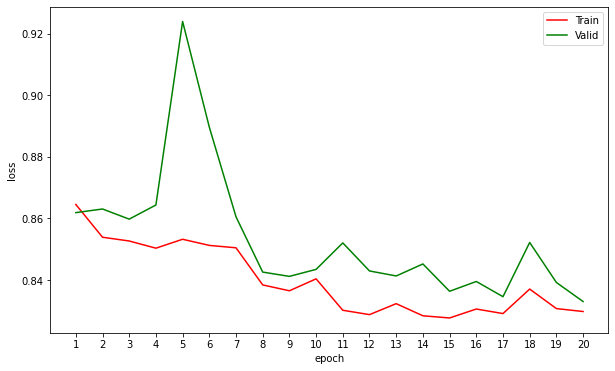

Finished Training


In [ ]:
model = Net().cuda()
num_epochs = 20
best_val_loss = None
criterion = nn.CrossEntropyLoss()
best_val_loss = None
optimizer = optim.Adam(model.parameters())
save_path = os.path.join(PATH, "preprocessed/model")
TRAIN(model, train_loader, valid_loader, num_epochs, criterion, optimizer, best_val_loss, device, save_path)

# Testing Accuracy Loop

In [ ]:
def get_test_accuracy(model_best, test_loader, predict_file_name, print_test_dataframe = False):
  model_best.eval()
  pred = []
  with torch.no_grad():
    for image, label in tqdm(test_loader):
      image = image.to(device)
      test_pred = model_best(image)
      pred.extend(test_pred.cpu().detach().numpy())
  test_label = np.array(pred)
  for i in range(len(test_label)):
    maxIndex = 0
    if test_label[i][0] >= test_label[i][1] and test_label[i][0] >= test_label[i][2]:
      maxIndex = 0
    elif test_label[i][1] >= test_label[i][0] and test_label[i][1] >= test_label[i][2]:
      maxIndex = 1
    else: 
      maxIndex = 2
    pred[i] = maxIndex

  test = pd.read_csv(os.path.join(PATH, "preprocessed/preprocessed_test.csv"))

  for i in range(409):
    test.iloc[i, 1] = pred[i]

  pred_path = os.path.join(PATH, "preprocessed/", predict_file_name)
  test.to_csv(pred_path, header = True, index = False)

  if print_test_dataframe:
    print(test)

  test_correct = 0
  preprocessed_test = pd.read_csv(os.path.join(PATH, "preprocessed/preprocessed_test.csv"))
  correct_label = preprocessed_test['label']
  for i in range(409):
    if pred[i] == correct_label[i]:
      test_correct += 1
  test_accuracy = test_correct/409
  print("test set accuracy: {:.2f}%".format(test_accuracy *100))
  return correct_label, pred

In [ ]:
model_best = model.to(device)
optimizer = optim.Adam(model_best.parameters())
save_path = os.path.join(PATH, "preprocessed/model")
best_val_loss = load_checkpoint(save_path, model_best, optimizer)
predict_file_name = "pred.csv"

correct_label_base, pred_base = get_test_accuracy(model_best, test_loader, predict_file_name, print_test_dataframe = True)

Model loaded from ./drive/My Drive/Comp 4211/Project 1/preprocessed/model, with val accuracy: 0.9399509803921569



                                          image_path  ...  difficult
0    preprocessed/images/maksssksksss603person17.png  ...          0
1     preprocessed/images/maksssksksss817person0.png  ...          0
2    preprocessed/images/maksssksksss477person10.png  ...          0
3     preprocessed/images/maksssksksss477person2.png  ...          0
4    preprocessed/images/maksssksksss240person50.png  ...          0
..                                               ...  ...        ...
404   preprocessed/images/maksssksksss748person0.png  ...          0
405   preprocessed/images/maksssksksss406person0.png  ...          0
406   preprocessed/images/maksssksksss737person2.png  ...          0
407   preprocessed/images/maksssksksss151person7.png  ...          0
408   preprocessed/images/maksssksksss272person0.png  ...          0

[409 rows x 6 columns]
test set accuracy: 93.40%


# Print confusion matrix code


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

def print_confusion_matrix(correct_label, pred): 
  print(classification_report(correct_label, pred))
  conf_mat = confusion_matrix(correct_label, pred)
  df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
  plt.figure(figsize = (5,3))
  sn.heatmap(df_cm, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      0.94      0.90        72
           1       0.95      0.97      0.96       324
           2       0.00      0.00      0.00        13

    accuracy                           0.93       409
   macro avg       0.60      0.64      0.62       409
weighted avg       0.91      0.93      0.92       409



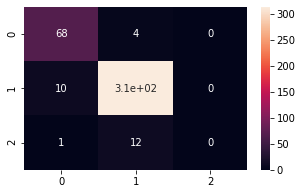

In [ ]:
print_confusion_matrix(correct_label_base, pred_base)

# Experiment: ResNet50

In [ ]:
import torchvision
resNet50 = torchvision.models.resnet50(pretrained=False, progress=True, num_classes = 3)


Epoch [1/20], Train Loss: 0.5059, Valid Loss: 0.5059, Valid Accuracy: 91.30%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/resNet_model



Epoch [2/20], Train Loss: 0.3628, Valid Loss: 0.3073, Valid Accuracy: 91.91%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/resNet_model



Epoch [3/20], Train Loss: 0.2445, Valid Loss: 0.2943, Valid Accuracy: 90.69%



Epoch [4/20], Train Loss: 0.2069, Valid Loss: 0.3301, Valid Accuracy: 88.73%



Epoch [5/20], Train Loss: 0.1880, Valid Loss: 0.2196, Valid Accuracy: 93.50%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/resNet_model



Epoch [6/20], Train Loss: 0.1702, Valid Loss: 0.2825, Valid Accuracy: 92.89%



Epoch [7/20], Train Loss: 0.1768, Valid Loss: 0.2724, Valid Accuracy: 91.91%



Epoch [8/20], Train Loss: 0.1671, Valid Loss: 0.2497, Valid Accuracy: 94.61%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/resNet_model



Epoch [9/20], Train Loss: 0.1449, Valid Loss: 0.2412, Valid Accuracy: 94.00%



Epoch [10/20], Train Loss: 0.1275, Valid Loss: 0.2665, Valid Accuracy: 90.56%



Epoch [11/20], Train Loss: 0.1606, Valid Loss: 0.3303, Valid Accuracy: 93.38%



Epoch [12/20], Train Loss: 0.1322, Valid Loss: 0.1960, Valid Accuracy: 94.24%



Epoch [13/20], Train Loss: 0.1137, Valid Loss: 0.2787, Valid Accuracy: 92.89%



Epoch [14/20], Train Loss: 0.1291, Valid Loss: 0.2362, Valid Accuracy: 93.01%



Epoch [15/20], Train Loss: 0.1172, Valid Loss: 0.2359, Valid Accuracy: 93.26%



Epoch [16/20], Train Loss: 0.3250, Valid Loss: 0.9666, Valid Accuracy: 89.71%



Epoch [17/20], Train Loss: 0.3167, Valid Loss: 0.3631, Valid Accuracy: 92.28%



Epoch [18/20], Train Loss: 0.2436, Valid Loss: 0.2801, Valid Accuracy: 91.79%



Epoch [19/20], Train Loss: 0.2066, Valid Loss: 0.2457, Valid Accuracy: 93.50%



Epoch [20/20], Train Loss: 0.1897, Valid Loss: 0.2934, Valid Accuracy: 89.83%


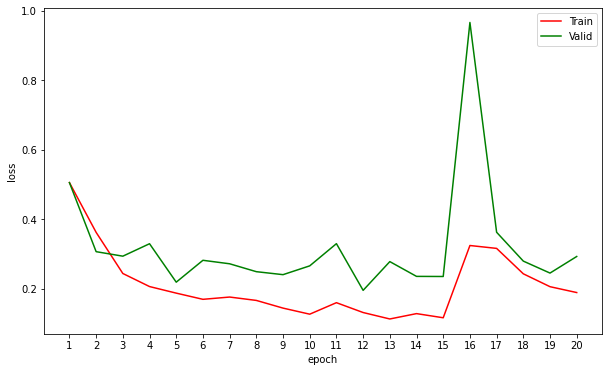

Finished Training


In [ ]:
model = resNet50.cuda()
num_epochs = 20
best_val_loss = None
criterion = nn.CrossEntropyLoss()
best_val_loss = None
optimizer = optim.Adam(model.parameters())
save_path = os.path.join(PATH, "preprocessed/resNet_model")
TRAIN(model, train_loader, valid_loader, num_epochs, criterion, optimizer, best_val_loss, device, save_path)

In [ ]:
model_best = model.to(device)
optimizer = optim.Adam(model_best.parameters())
save_path = os.path.join(PATH, "preprocessed/resNet_model")
best_val_loss = load_checkpoint(save_path, model_best, optimizer)
predict_file_name = "pred_resNet.csv"

correct_label, pred = get_test_accuracy(model_best, test_loader, predict_file_name, print_test_dataframe = True)

Model loaded from ./drive/My Drive/Comp 4211/Project 1/preprocessed/resNet_model, with val accuracy: 0.946078431372549



                                          image_path  ...  difficult
0    preprocessed/images/maksssksksss603person17.png  ...          0
1     preprocessed/images/maksssksksss817person0.png  ...          0
2    preprocessed/images/maksssksksss477person10.png  ...          0
3     preprocessed/images/maksssksksss477person2.png  ...          0
4    preprocessed/images/maksssksksss240person50.png  ...          0
..                                               ...  ...        ...
404   preprocessed/images/maksssksksss748person0.png  ...          0
405   preprocessed/images/maksssksksss406person0.png  ...          0
406   preprocessed/images/maksssksksss737person2.png  ...          0
407   preprocessed/images/maksssksksss151person7.png  ...          0
408   preprocessed/images/maksssksksss272person0.png  ...          0

[409 rows x 6 columns]
test set accuracy: 93.89%


              precision    recall  f1-score   support

           0       0.86      0.94      0.90        72
           1       0.95      0.97      0.96       324
           2       0.00      0.00      0.00        13

    accuracy                           0.93       409
   macro avg       0.60      0.64      0.62       409
weighted avg       0.91      0.93      0.92       409



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


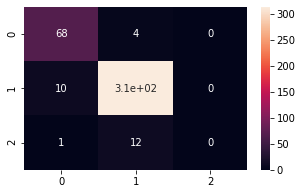

In [ ]:
print_confusion_matrix(correct_label_base, pred_base)

# Experiment: Learning Rate


Epoch [1/20], Train Loss: 0.8829, Valid Loss: 0.8464, Valid Accuracy: 91.67%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [2/20], Train Loss: 0.8370, Valid Loss: 0.8413, Valid Accuracy: 92.16%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [3/20], Train Loss: 0.8317, Valid Loss: 0.8390, Valid Accuracy: 93.14%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [4/20], Train Loss: 0.8280, Valid Loss: 0.8373, Valid Accuracy: 93.01%



Epoch [5/20], Train Loss: 0.8285, Valid Loss: 0.8405, Valid Accuracy: 92.16%



Epoch [6/20], Train Loss: 0.8256, Valid Loss: 0.8343, Valid Accuracy: 94.00%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [7/20], Train Loss: 0.8230, Valid Loss: 0.8380, Valid Accuracy: 93.38%



Epoch [8/20], Train Loss: 0.8232, Valid Loss: 0.8375, Valid Accuracy: 92.77%



Epoch [9/20], Train Loss: 0.8239, Valid Loss: 0.8332, Valid Accuracy: 94.24%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [10/20], Train Loss: 0.8223, Valid Loss: 0.8362, Valid Accuracy: 93.01%



Epoch [11/20], Train Loss: 0.8221, Valid Loss: 0.8319, Valid Accuracy: 94.24%



Epoch [12/20], Train Loss: 0.8203, Valid Loss: 0.8311, Valid Accuracy: 94.49%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [13/20], Train Loss: 0.8222, Valid Loss: 0.8324, Valid Accuracy: 94.73%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [14/20], Train Loss: 0.8199, Valid Loss: 0.8302, Valid Accuracy: 94.73%



Epoch [15/20], Train Loss: 0.8208, Valid Loss: 0.8303, Valid Accuracy: 94.98%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [16/20], Train Loss: 0.8195, Valid Loss: 0.8276, Valid Accuracy: 95.47%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr



Epoch [17/20], Train Loss: 0.8184, Valid Loss: 0.8296, Valid Accuracy: 94.98%



Epoch [18/20], Train Loss: 0.8204, Valid Loss: 0.8354, Valid Accuracy: 93.01%



Epoch [19/20], Train Loss: 0.8198, Valid Loss: 0.8284, Valid Accuracy: 95.22%



Epoch [20/20], Train Loss: 0.8204, Valid Loss: 0.8302, Valid Accuracy: 94.73%


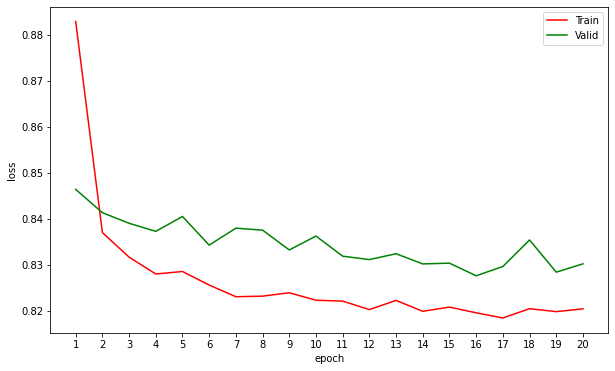

Finished Training


In [ ]:
model = Net().cuda()
num_epochs = 20
best_val_loss = None
criterion = nn.CrossEntropyLoss()
best_val_loss = None
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
save_path = os.path.join(PATH, "preprocessed/model_change_lr")
TRAIN(model, train_loader, valid_loader, num_epochs, criterion, optimizer, best_val_loss, device, save_path)

In [ ]:
model_best = model.to(device)
optimizer = optim.Adam(model_best.parameters())
save_path = os.path.join(PATH, "preprocessed/model_change_lr")
best_val_loss = load_checkpoint(save_path, model_best, optimizer)
predict_file_name = "pred_change_lr.csv"

correct_label, pred = get_test_accuracy(model_best, test_loader, predict_file_name, print_test_dataframe = True)

Model loaded from ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr, with val accuracy: 0.9546568627450981



                                          image_path  ...  difficult
0    preprocessed/images/maksssksksss603person17.png  ...          0
1     preprocessed/images/maksssksksss817person0.png  ...          0
2    preprocessed/images/maksssksksss477person10.png  ...          0
3     preprocessed/images/maksssksksss477person2.png  ...          0
4    preprocessed/images/maksssksksss240person50.png  ...          0
..                                               ...  ...        ...
404   preprocessed/images/maksssksksss748person0.png  ...          0
405   preprocessed/images/maksssksksss406person0.png  ...          0
406   preprocessed/images/maksssksksss737person2.png  ...          0
407   preprocessed/images/maksssksksss151person7.png  ...          0
408   preprocessed/images/maksssksksss272person0.png  ...          0

[409 rows x 6 columns]
test set accuracy: 94.62%


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        72
           1       0.95      0.99      0.97       324
           2       0.00      0.00      0.00        13

    accuracy                           0.95       409
   macro avg       0.63      0.64      0.63       409
weighted avg       0.92      0.95      0.93       409



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


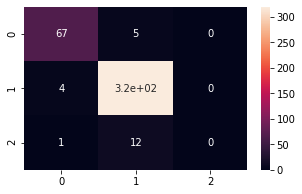

In [ ]:
print_confusion_matrix(correct_label, pred)


Epoch [1/50], Train Loss: 0.8802, Valid Loss: 0.8457, Valid Accuracy: 91.91%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch



Epoch [2/50], Train Loss: 0.8328, Valid Loss: 0.8402, Valid Accuracy: 93.26%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch



Epoch [3/50], Train Loss: 0.8309, Valid Loss: 0.8389, Valid Accuracy: 92.77%



Epoch [4/50], Train Loss: 0.8294, Valid Loss: 0.8360, Valid Accuracy: 94.00%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch



Epoch [5/50], Train Loss: 0.8249, Valid Loss: 0.8328, Valid Accuracy: 94.00%



Epoch [6/50], Train Loss: 0.8235, Valid Loss: 0.8470, Valid Accuracy: 91.42%



Epoch [7/50], Train Loss: 0.8231, Valid Loss: 0.8312, Valid Accuracy: 94.61%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch



Epoch [8/50], Train Loss: 0.8209, Valid Loss: 0.8302, Valid Accuracy: 94.98%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch



Epoch [9/50], Train Loss: 0.8227, Valid Loss: 0.8312, Valid Accuracy: 94.85%



Epoch [10/50], Train Loss: 0.8215, Valid Loss: 0.8332, Valid Accuracy: 94.61%



Epoch [11/50], Train Loss: 0.8203, Valid Loss: 0.8305, Valid Accuracy: 94.85%



Epoch [12/50], Train Loss: 0.8204, Valid Loss: 0.8305, Valid Accuracy: 94.61%



Epoch [13/50], Train Loss: 0.8207, Valid Loss: 0.8280, Valid Accuracy: 95.22%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch



Epoch [14/50], Train Loss: 0.8195, Valid Loss: 0.8328, Valid Accuracy: 93.87%



Epoch [15/50], Train Loss: 0.8192, Valid Loss: 0.8331, Valid Accuracy: 94.12%



Epoch [16/50], Train Loss: 0.8175, Valid Loss: 0.8313, Valid Accuracy: 94.36%



Epoch [17/50], Train Loss: 0.8195, Valid Loss: 0.8294, Valid Accuracy: 95.10%



Epoch [18/50], Train Loss: 0.8189, Valid Loss: 0.8293, Valid Accuracy: 94.73%



Epoch [19/50], Train Loss: 0.8188, Valid Loss: 0.8262, Valid Accuracy: 95.47%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch



Epoch [20/50], Train Loss: 0.8196, Valid Loss: 0.8374, Valid Accuracy: 93.26%



Epoch [21/50], Train Loss: 0.8182, Valid Loss: 0.8286, Valid Accuracy: 95.10%



Epoch [22/50], Train Loss: 0.8161, Valid Loss: 0.8300, Valid Accuracy: 94.73%



Epoch [23/50], Train Loss: 0.8173, Valid Loss: 0.8285, Valid Accuracy: 95.10%



Epoch [24/50], Train Loss: 0.8183, Valid Loss: 0.8274, Valid Accuracy: 95.22%



Epoch [25/50], Train Loss: 0.8161, Valid Loss: 0.8287, Valid Accuracy: 94.98%



Epoch [26/50], Train Loss: 0.8168, Valid Loss: 0.8309, Valid Accuracy: 94.49%



Epoch [27/50], Train Loss: 0.8181, Valid Loss: 0.8246, Valid Accuracy: 95.96%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch



Epoch [28/50], Train Loss: 0.8207, Valid Loss: 0.8314, Valid Accuracy: 94.12%



Epoch [29/50], Train Loss: 0.8169, Valid Loss: 0.8278, Valid Accuracy: 95.10%



Epoch [30/50], Train Loss: 0.8169, Valid Loss: 0.8264, Valid Accuracy: 95.59%



Epoch [31/50], Train Loss: 0.8155, Valid Loss: 0.8294, Valid Accuracy: 95.22%



Epoch [32/50], Train Loss: 0.8148, Valid Loss: 0.8275, Valid Accuracy: 95.22%



Epoch [33/50], Train Loss: 0.8159, Valid Loss: 0.8279, Valid Accuracy: 95.10%



Epoch [34/50], Train Loss: 0.8166, Valid Loss: 0.8258, Valid Accuracy: 95.59%



Epoch [35/50], Train Loss: 0.8158, Valid Loss: 0.8259, Valid Accuracy: 95.59%



Epoch [36/50], Train Loss: 0.8143, Valid Loss: 0.8273, Valid Accuracy: 95.22%



Epoch [37/50], Train Loss: 0.8152, Valid Loss: 0.8303, Valid Accuracy: 94.73%



Epoch [38/50], Train Loss: 0.8159, Valid Loss: 0.8264, Valid Accuracy: 95.59%



Epoch [39/50], Train Loss: 0.8153, Valid Loss: 0.8265, Valid Accuracy: 95.71%



Epoch [40/50], Train Loss: 0.8145, Valid Loss: 0.8278, Valid Accuracy: 95.10%



Epoch [41/50], Train Loss: 0.8150, Valid Loss: 0.8280, Valid Accuracy: 95.22%



Epoch [42/50], Train Loss: 0.8156, Valid Loss: 0.8268, Valid Accuracy: 95.22%



Epoch [43/50], Train Loss: 0.8156, Valid Loss: 0.8330, Valid Accuracy: 94.24%



Epoch [44/50], Train Loss: 0.8180, Valid Loss: 0.8279, Valid Accuracy: 94.85%



Epoch [45/50], Train Loss: 0.8140, Valid Loss: 0.8287, Valid Accuracy: 95.34%



Epoch [46/50], Train Loss: 0.8155, Valid Loss: 0.8285, Valid Accuracy: 95.10%



Epoch [47/50], Train Loss: 0.8140, Valid Loss: 0.8268, Valid Accuracy: 95.47%



Epoch [48/50], Train Loss: 0.8144, Valid Loss: 0.8275, Valid Accuracy: 95.10%



Epoch [49/50], Train Loss: 0.8142, Valid Loss: 0.8250, Valid Accuracy: 95.71%



Epoch [50/50], Train Loss: 0.8143, Valid Loss: 0.8296, Valid Accuracy: 94.85%


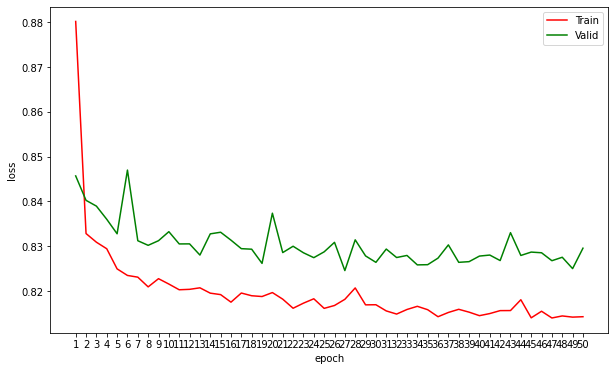

Finished Training


In [ ]:
model = Net().cuda()
num_epochs = 50
best_val_loss = None
criterion = nn.CrossEntropyLoss()
best_val_loss = None
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
save_path = os.path.join(PATH, "preprocessed/model_change_lr_and_epoch")
TRAIN(model, train_loader, valid_loader, num_epochs, criterion, optimizer, best_val_loss, device, save_path)

In [ ]:
model_best = Net().to(device)
optimizer = optim.Adam(model_best.parameters())
save_path = os.path.join(PATH, "preprocessed/model_change_lr_and_epoch")
best_val_loss = load_checkpoint(save_path, model_best, optimizer)
predict_file_name = "pred_change_lr_and_epoch.csv"

correct_label, pred = get_test_accuracy(model_best, test_loader, predict_file_name, print_test_dataframe = True)

Model loaded from ./drive/My Drive/Comp 4211/Project 1/preprocessed/model_change_lr_and_epoch, with val accuracy: 0.9595588235294118



                                          image_path  ...  difficult
0    preprocessed/images/maksssksksss603person17.png  ...          0
1     preprocessed/images/maksssksksss817person0.png  ...          0
2    preprocessed/images/maksssksksss477person10.png  ...          0
3     preprocessed/images/maksssksksss477person2.png  ...          0
4    preprocessed/images/maksssksksss240person50.png  ...          0
..                                               ...  ...        ...
404   preprocessed/images/maksssksksss748person0.png  ...          0
405   preprocessed/images/maksssksksss406person0.png  ...          0
406   preprocessed/images/maksssksksss737person2.png  ...          0
407   preprocessed/images/maksssksksss151person7.png  ...          0
408   preprocessed/images/maksssksksss272person0.png  ...          0

[409 rows x 6 columns]
test set accuracy: 93.64%


              precision    recall  f1-score   support

           0       0.91      0.89      0.90        72
           1       0.94      0.98      0.96       324
           2       0.00      0.00      0.00        13

    accuracy                           0.94       409
   macro avg       0.62      0.62      0.62       409
weighted avg       0.91      0.94      0.92       409



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


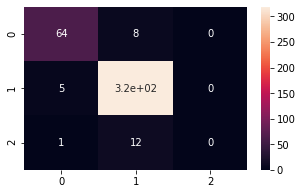

In [ ]:
print_confusion_matrix(correct_label, pred)

# Experiment: Baseline with Dropout

In [ ]:
class Drop_Net(nn.Module):
    def __init__(self):
        super(Drop_Net, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), #32*32*32
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride = 2), #32*16*16
            nn.Conv2d(in_channels = 32, out_channels = 64, kernel_size = 3, padding = 1), #64*16*16
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(in_channels = 64, out_channels = 128, kernel_size = 3, padding = 1), #128*16*16
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d((2, 2), stride = 2), #128*8*8
            nn.Conv2d(in_channels = 128, out_channels = 256, kernel_size = 3, padding = 1), #256*8*8
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(in_channels = 256, out_channels = 512, kernel_size = 3, padding = 1), #512*8*8
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.AvgPool2d((8, 8), stride = 1), #512*1*1
            nn.Flatten()
        )
        self.fc = nn.Sequential(
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Dropout(p=0.1),
            nn.Linear(512, 3),
            nn.ReLU()
        )


    def forward(self, x):
        x = self.cnn(x)
        x = self.fc(x)
        x = torch.sigmoid(x)
        return x


Epoch [1/50], Train Loss: 0.8625, Valid Loss: 0.8644, Valid Accuracy: 79.29%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [2/50], Train Loss: 0.8558, Valid Loss: 0.8632, Valid Accuracy: 80.02%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [3/50], Train Loss: 0.8561, Valid Loss: 0.8616, Valid Accuracy: 84.07%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [4/50], Train Loss: 0.8521, Valid Loss: 0.8592, Valid Accuracy: 79.29%



Epoch [5/50], Train Loss: 0.8519, Valid Loss: 0.8714, Valid Accuracy: 88.85%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [6/50], Train Loss: 0.8543, Valid Loss: 0.8691, Valid Accuracy: 89.22%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [7/50], Train Loss: 0.8609, Valid Loss: 0.8728, Valid Accuracy: 81.50%



Epoch [8/50], Train Loss: 0.8562, Valid Loss: 0.8600, Valid Accuracy: 85.17%



Epoch [9/50], Train Loss: 0.8514, Valid Loss: 0.8648, Valid Accuracy: 87.62%



Epoch [10/50], Train Loss: 0.8497, Valid Loss: 0.8635, Valid Accuracy: 83.82%



Epoch [11/50], Train Loss: 0.8487, Valid Loss: 0.8624, Valid Accuracy: 86.27%



Epoch [12/50], Train Loss: 0.8485, Valid Loss: 0.8586, Valid Accuracy: 83.82%



Epoch [13/50], Train Loss: 0.8490, Valid Loss: 0.8700, Valid Accuracy: 89.95%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [14/50], Train Loss: 0.8554, Valid Loss: 0.8947, Valid Accuracy: 79.17%



Epoch [15/50], Train Loss: 0.8507, Valid Loss: 0.8649, Valid Accuracy: 81.74%



Epoch [16/50], Train Loss: 0.8501, Valid Loss: 0.8589, Valid Accuracy: 92.89%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [17/50], Train Loss: 0.8475, Valid Loss: 0.8596, Valid Accuracy: 92.03%



Epoch [18/50], Train Loss: 0.8488, Valid Loss: 0.8586, Valid Accuracy: 92.77%



Epoch [19/50], Train Loss: 0.8464, Valid Loss: 0.8548, Valid Accuracy: 91.30%



Epoch [20/50], Train Loss: 0.8495, Valid Loss: 0.8580, Valid Accuracy: 91.05%



Epoch [21/50], Train Loss: 0.8474, Valid Loss: 0.8588, Valid Accuracy: 92.40%



Epoch [22/50], Train Loss: 0.8516, Valid Loss: 0.8574, Valid Accuracy: 92.65%



Epoch [23/50], Train Loss: 0.8454, Valid Loss: 0.8573, Valid Accuracy: 92.40%



Epoch [24/50], Train Loss: 0.8480, Valid Loss: 0.8569, Valid Accuracy: 91.42%



Epoch [25/50], Train Loss: 0.8482, Valid Loss: 0.8555, Valid Accuracy: 92.89%



Epoch [26/50], Train Loss: 0.8485, Valid Loss: 0.8594, Valid Accuracy: 93.75%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [27/50], Train Loss: 0.8503, Valid Loss: 0.8617, Valid Accuracy: 85.29%



Epoch [28/50], Train Loss: 0.8490, Valid Loss: 0.8624, Valid Accuracy: 89.58%



Epoch [29/50], Train Loss: 0.8463, Valid Loss: 0.8580, Valid Accuracy: 93.01%



Epoch [30/50], Train Loss: 0.8482, Valid Loss: 0.8566, Valid Accuracy: 92.65%



Epoch [31/50], Train Loss: 0.8535, Valid Loss: 0.8582, Valid Accuracy: 93.87%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [32/50], Train Loss: 0.8508, Valid Loss: 0.8553, Valid Accuracy: 94.12%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [33/50], Train Loss: 0.8283, Valid Loss: 0.8398, Valid Accuracy: 92.65%



Epoch [34/50], Train Loss: 0.8318, Valid Loss: 0.8369, Valid Accuracy: 93.14%



Epoch [35/50], Train Loss: 0.8301, Valid Loss: 0.8461, Valid Accuracy: 91.05%



Epoch [36/50], Train Loss: 0.8349, Valid Loss: 0.8389, Valid Accuracy: 92.77%



Epoch [37/50], Train Loss: 0.8279, Valid Loss: 0.8359, Valid Accuracy: 93.38%



Epoch [38/50], Train Loss: 0.8269, Valid Loss: 0.8356, Valid Accuracy: 93.26%



Epoch [39/50], Train Loss: 0.8278, Valid Loss: 0.8353, Valid Accuracy: 93.50%



Epoch [40/50], Train Loss: 0.8250, Valid Loss: 0.8372, Valid Accuracy: 93.26%



Epoch [41/50], Train Loss: 0.8269, Valid Loss: 0.8388, Valid Accuracy: 92.77%



Epoch [42/50], Train Loss: 0.8252, Valid Loss: 0.8349, Valid Accuracy: 93.50%



Epoch [43/50], Train Loss: 0.8256, Valid Loss: 0.8328, Valid Accuracy: 94.24%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model



Epoch [44/50], Train Loss: 0.8246, Valid Loss: 0.8438, Valid Accuracy: 91.67%



Epoch [45/50], Train Loss: 0.8246, Valid Loss: 0.8373, Valid Accuracy: 92.89%



Epoch [46/50], Train Loss: 0.8281, Valid Loss: 0.8383, Valid Accuracy: 92.89%



Epoch [47/50], Train Loss: 0.8300, Valid Loss: 0.8404, Valid Accuracy: 92.40%



Epoch [48/50], Train Loss: 0.8284, Valid Loss: 0.8404, Valid Accuracy: 92.40%



Epoch [49/50], Train Loss: 0.8262, Valid Loss: 0.8329, Valid Accuracy: 94.00%



Epoch [50/50], Train Loss: 0.8230, Valid Loss: 0.8311, Valid Accuracy: 94.36%
Model saved to ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model


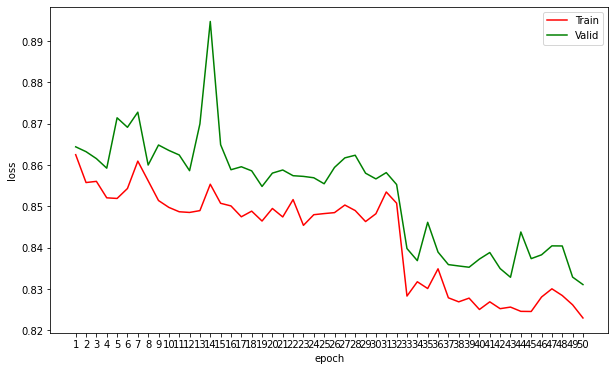

Finished Training


In [ ]:
model = Drop_Net().cuda()
num_epochs = 50
best_val_loss = None
model = model.to(device)
criterion = nn.CrossEntropyLoss()
best_val_loss = None
optimizer = optim.Adam(model.parameters())
save_path = os.path.join(PATH, "preprocessed/dropout_model")
TRAIN(model, train_loader, valid_loader, num_epochs, criterion, optimizer, best_val_loss, device, save_path)

In [ ]:
model_best = model.to(device)
optimizer = optim.Adam(model_best.parameters())
save_path = os.path.join(PATH, "preprocessed/dropout_model")
best_val_loss = load_checkpoint(save_path, model_best, optimizer)
predict_file_name = "pred_dropout.csv"

correct_label, pred = get_test_accuracy(model_best, test_loader, predict_file_name, print_test_dataframe = True)

Model loaded from ./drive/My Drive/Comp 4211/Project 1/preprocessed/dropout_model, with val accuracy: 0.9436274509803921



                                          image_path  ...  difficult
0    preprocessed/images/maksssksksss603person17.png  ...          0
1     preprocessed/images/maksssksksss817person0.png  ...          0
2    preprocessed/images/maksssksksss477person10.png  ...          0
3     preprocessed/images/maksssksksss477person2.png  ...          0
4    preprocessed/images/maksssksksss240person50.png  ...          0
..                                               ...  ...        ...
404   preprocessed/images/maksssksksss748person0.png  ...          0
405   preprocessed/images/maksssksksss406person0.png  ...          0
406   preprocessed/images/maksssksksss737person2.png  ...          0
407   preprocessed/images/maksssksksss151person7.png  ...          0
408   preprocessed/images/maksssksksss272person0.png  ...          0

[409 rows x 6 columns]
test set accuracy: 94.13%


              precision    recall  f1-score   support

           0       0.91      0.93      0.92        72
           1       0.95      0.98      0.97       324
           2       0.00      0.00      0.00        13

    accuracy                           0.94       409
   macro avg       0.62      0.64      0.63       409
weighted avg       0.91      0.94      0.93       409



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


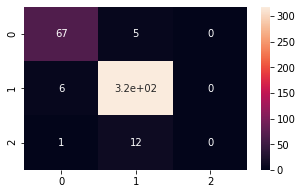

In [ ]:
print_confusion_matrix(correct_label, pred)